Handling Null Values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
## Loading the Data

In [3]:
df = pd.read_csv('Downloads/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Classifiaction Problems -- in Binary formate like 0,1 : yes or no : true or false.

# Here in this poblems 'Survived' is the Output


In [5]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
# describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## Checking for Null Values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Total Rows are 891 
# Age column having 177 Null Values. Data Type - Continious
# Cabin column having 687 Null values . Data Type - Object
# Embarked column having 2 Null values . Data Type - Object

In [9]:
# Process for replacing ther Null Values using mean,median & mode


In [10]:
df['Age'].isnull().sum()

177

In [11]:
# Mean   --- Formula = Sum of observation/ No of observation

mean = df['Age'].mean()
mean

29.69911764705882

In [12]:
# Median  -- formula = if even n/2 or odd (n+1)/2

median = df['Age'].median()
median

28.0

In [13]:
# mode -- Most repeted value 

mode = df['Age'].mode()
mode

0    24.0
dtype: float64

## 1.1 Null values replacing with Mean value

In [14]:
def new(df,rowname,mean):
    df[rowname+"_Mean"] = df['Age'].fillna(mean)

new(df,'Age',mean)

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean'],
      dtype='object')

In [16]:
df["Age_Mean"].isnull().sum()

0

In [17]:
# check the precentage of null value - For Information

df["Age"].isnull().mean()

0.19865319865319866

In [18]:
# similarly for new row 

df['Age_Mean'].isnull().mean()

0.0

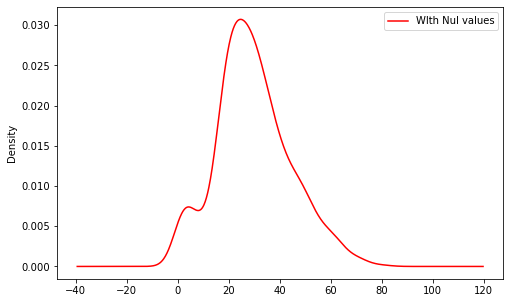

In [19]:
plt.figure(figsize=(8,5))
df['Age'].plot(kind="kde",color='red',label='WIth Nul values')
plt.legend(loc=0)
plt.show()

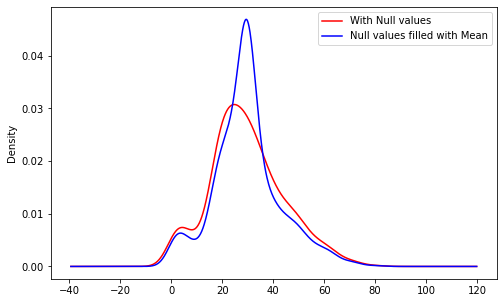

In [20]:
plt.figure(figsize=(8,5))
df['Age'].plot(kind="kde",color='red',label='With Null values')
df['Age_Mean'].plot(kind="kde",color='blue',label='Null values filled with Mean')
plt.legend(loc=0)
plt.show()

In [21]:
df['Age'].std()

14.526497332334044

In [22]:
df['Age_Mean'].std()

13.002015226002884

In [23]:
# since the std differnce between 'Age' and "Age_mean' is 14.52-13.00 = 1.52

# let's try with median values.

## 1.2 Null values replacing with Median value

In [24]:
median = df["Age"].median()

In [25]:
median

28.0

In [26]:
def new2(df,median):
    df["Age_median"] = df['Age'].fillna(median)
    
new2(df,median)

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean',
       'Age_median'],
      dtype='object')

In [28]:
df["Age_median"].isnull().sum()

0

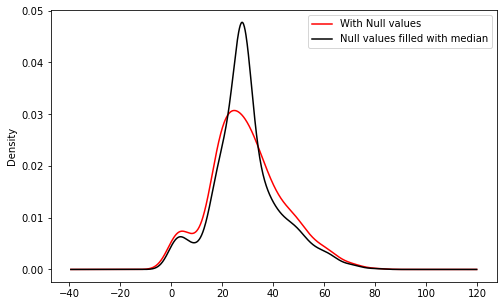

In [29]:
plt.figure(figsize=(8,5))
df['Age'].plot(kind="kde",color='red',label='With Null values')
df['Age_median'].plot(kind="kde",color='black',label='Null values filled with median')
plt.legend(loc=0)
plt.show()

In [30]:
df['Age'].std()

14.526497332334044

In [31]:
df['Age_median'].std()

13.019696550973194

In [32]:
# since the std differnce between 'Age' and "Age_median' is 14.52-13.01 = 1.51

# let's try with mode values.

## 1.3 Null values replacing with Mode value

In [33]:
mode =df['Age'].mode()
mode

0    24.0
dtype: float64

In [36]:
def new2(df,mode):
    df['Age_mode'] = df['Age'].fillna(mode)[0]

new2(df,mode)

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean',
       'Age_median', 'Age_mode'],
      dtype='object')

In [38]:
df['Age_mode'].isnull().sum()

0

In [39]:
df["Age"].std()

14.526497332334044

In [40]:
df["Age_mode"].std()

0.0

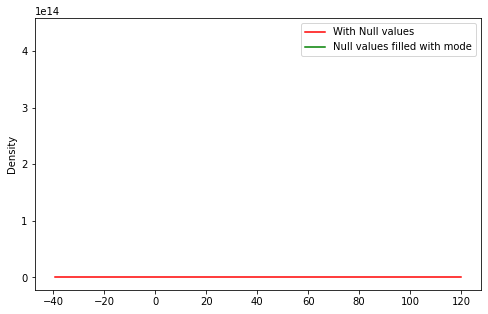

In [41]:
plt.figure(figsize=(8,5))
df['Age'].plot(kind="kde",color='red',label='With Null values')
df['Age_mode'].plot(kind="kde",color='green',label='Null values filled with mode')
plt.legend(loc=0)
plt.show()

In [42]:
## since SD is '0' in Age_mode we are not consider this.

In [43]:
## Out of Mean,Medoian and mode . Median is best becuase SD of median is closer to "Age" SD

## 2. Null value Repaced with Binary values(0,1)

In [44]:
df["Age_binary"] = np.where(df["Age"].isnull(),1,0)

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean',
       'Age_median', 'Age_mode', 'Age_binary'],
      dtype='object')

In [47]:
df[["Age","Age_binary"]]

,Age,Age_binary
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


In [48]:
df["Age_binary"].isnull().sum()

0

In [49]:
# Advantages = easy to implement 
# Disadvantage = Loss of Data  

## usally not recommened this type of technique

##  3. Arbitary Imputation (Max and Min Value)

In [78]:
max_val = df["Age"].max()
max_val

80.0

In [79]:
min_val = df["Age"].min()
min_val

0.42

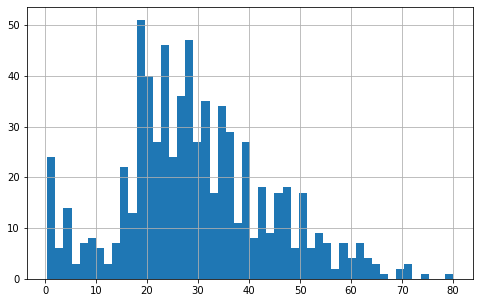

In [80]:
plt.figure(figsize=(8,5))
df["Age"].hist(bins=50)
plt.show()

In [81]:
# Creating new columns in Age uisng min vaale and check for graph

df["Age_min"] = df['Age'].fillna(min_val)

In [82]:
df["Age_min"].isnull().sum()

0

In [83]:
df["Age_min"].std()

17.483538436526285

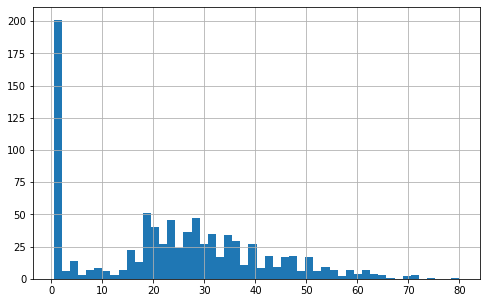

In [84]:
plt.figure(figsize=(8,5))
df["Age_min"].hist(bins=50)
plt.show()

In [85]:
# Creating new columns in Age uisng max value and check for graph

df["Age_max"] = df['Age'].fillna(max_val)

In [86]:
df["Age_max"].isnull().sum()

0

In [87]:
df["Age_max"].std()

23.9224661195059

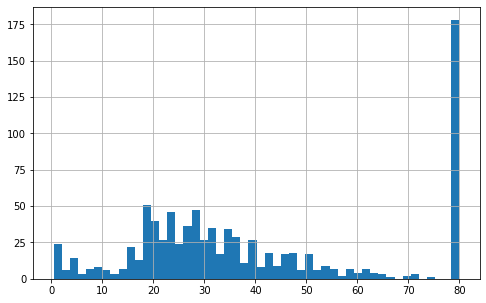

In [88]:
plt.figure(figsize=(8,5))
df["Age_max"].hist(bins=50)
plt.show()

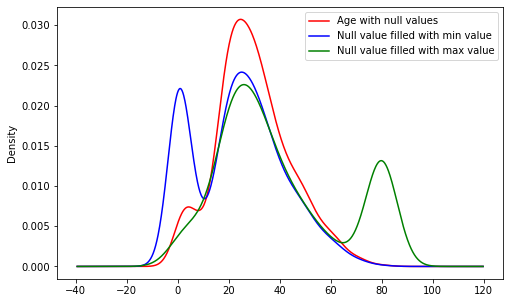

In [91]:
## lets for KDE for both values

plt.figure(figsize=(8,5))
df["Age"].plot(kind='kde',color='red',label="Age with null values")
df["Age_min"].plot(kind='kde',color="blue",label="Null value filled with min value")
df["Age_max"].plot(kind='kde',color="green",label="Null value filled with max value")
plt.legend(loc=0)
plt.legend(loc=0)
plt.show()


In [92]:
## from graph we are selcet the best column
## so by comparing the both SD, Age_min Std is closer to Age SD So Select Age_min column

In [93]:
## Advantage = easy to implement 
## Disadvantage = we dont know what value to take 

# 4. End of Dstribution (+ve 3rd SD value)

In [94]:
## selecting last value from the distribution

In [102]:
EOD = df["Age"].mean() + 3 * df['Age'].std()
EOD

73.27860964406095

In [103]:
## Replace null value with EOD value

df["Age_eod"] = df['Age'].fillna(EOD)

In [104]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean',
       'Age_median', 'Age_mode', 'Age_binary', 'Age_min', 'Age_max',
       'Age_eod'],
      dtype='object')

In [105]:
df["Age_eod"].isnull().sum()

0

In [108]:
df["Age_eod"].std()

21.719150677136366

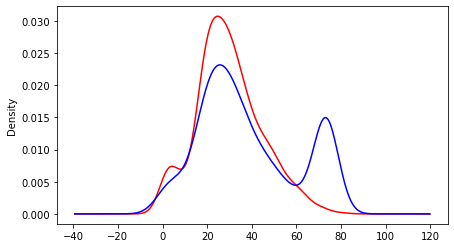

In [109]:
plt.figure(figsize = (7,4))
df['Age'].plot(kind = 'kde' , color = 'red' , label = 'Age with Null value')
df['Age_eod'].plot(kind = 'kde' , color = 'blue' , label = 'Null value filled with EOD value')
plt.show()

## 5 . Sample Random technique

In [110]:
## fill the Null Values with Random sample number in the Age column.

In [111]:
def fill(df):
    df['Age_sample'] = df["Age"]
    random = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=1)
    random.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull(),"Age_sample"] = random
    
fill(df)

In [112]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean',
       'Age_median', 'Age_mode', 'Age_binary', 'Age_min', 'Age_max', 'Age_eod',
       'Age_sample'],
      dtype='object')

In [113]:
df["Age_sample"].isnull().sum()

0

In [114]:
df['Age_sample'].std()

14.554392980261893

In [115]:
df["Age"].std()

14.526497332334044

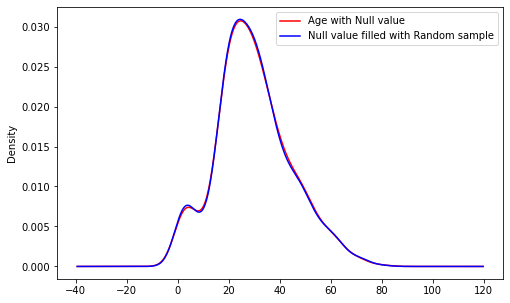

In [118]:
plt.figure(figsize = (8,5))
df['Age'].plot(kind = 'kde' , color = 'red' , label = 'Age with Null value')
df['Age_sample'].plot(kind = 'kde' , color = 'blue' , label = 'Null value filled with Random sample')
plt.legend(loc=0)
plt.show()

In [119]:
# From the above graph we can say this is most suitable replaced column
# The differnce in SD between 2 colums is very less

In [120]:
# In Real World the mostly used techniques are listed below

# 1. Random Sample Technique
# 2. Mean Median and mode
# 3. Arbitary Technique
# 4. End of Distrubution
# 5. Some other value(Binary value)

In [121]:
df .columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean',
       'Age_median', 'Age_mode', 'Age_binary', 'Age_min', 'Age_max', 'Age_eod',
       'Age_sample'],
      dtype='object')

In [122]:
df = df.drop(["Age",'Age_Mean','Age_median','Age_mode','Age_binary','Age_min','Age_max','Age_eod'],axis=1)

In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_sample
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
